<a href="https://colab.research.google.com/github/2303A52060/Generative-AI/blob/main/GI_ASS_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-8

Dataset not found! Downloading from UCI repository...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.2225 - loss: 1.8200 - val_accuracy: 0.2531 - val_loss: 1.7890
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2268 - loss: 1.8250 - val_accuracy: 0.2531 - val_loss: 1.7889
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2392 - loss: 1.8127 - val_accuracy: 0.2531 - val_loss: 1.7888
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2263 - loss: 1.7922 - val_accuracy: 0.2531 - val_loss: 1.7887
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2052 - loss: 1.8058 - val_accuracy: 0.2531 - val_loss: 1.7885
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2382 - loss: 1.8019 - val_accuracy: 0.2531 - val_loss: 1.7884
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2095 - loss: 1.8251 - val_accuracy: 0.2531 - val_loss: 1.7883
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2173 - loss: 1.8023 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0000    0.0000    0.0000        10
           2     0.0000    0.0000    0.0000       130
           3     0.4008    0.7500    0.5224       132
           4     0.0000    0.0000    0.0000        42
           5     0.0161    0.2000    0.0299         5

    accuracy                         0.3125       320
   macro avg     0.0695    0.1583    0.0920       320
weighted avg     0.1656    0.3125    0.2160       320

Model saved as 'wine_quality_ann.h5'


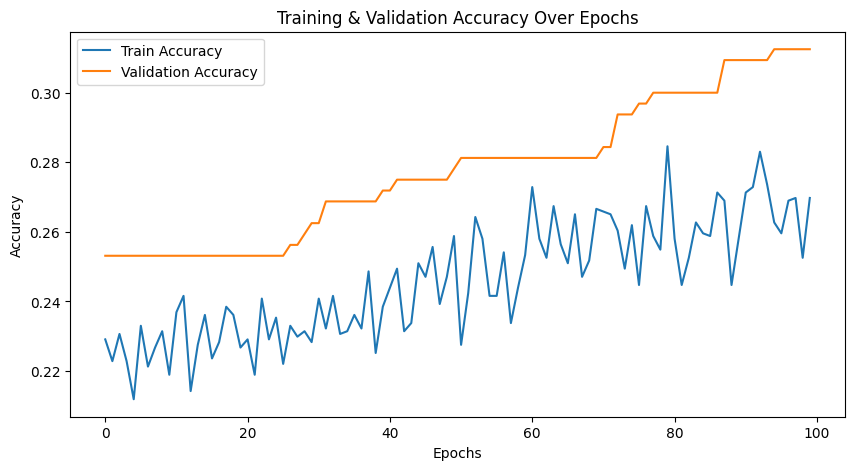

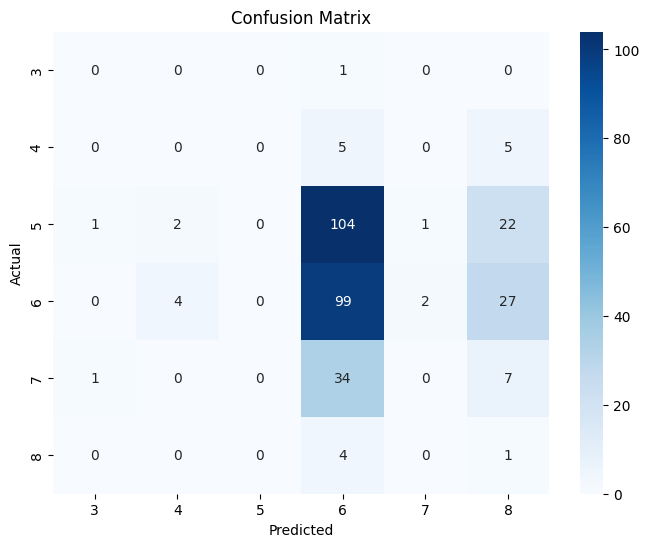

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Function to load dataset
def load_dataset():
    file_path = "winequality-red(1).csv"

    # If file doesn't exist, download it
    if not os.path.exists(file_path):
        print("Dataset not found! Downloading from UCI repository...")
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
        df = pd.read_csv(url, sep=";")
        df.to_csv(file_path, index=False)  # Save for future use
    else:
        df = pd.read_csv(file_path)

    return df

# Load dataset
df = load_dataset()

# Data Preprocessing
X = df.drop(columns=["quality"]).values  # Features
y = df["quality"].values  # Target

# Encode labels (wine quality) into classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts quality levels to categorical labels

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for later use in deployment
import joblib
joblib.dump(scaler, "scaler.pkl")

# Build the ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Prevent overfitting
    Dense(20, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the Model
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:\n", report)

# Save the Model
model.save("wine_quality_ann.h5")
print("Model saved as 'wine_quality_ann.h5'")

# Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy Over Epochs')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df["quality"]),
            yticklabels=np.unique(df["quality"]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
